<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/FDI_Gambia_Vs_Rem_Gambia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load and Preprocess Data
import pandas as pd

# Load the dataset
file_path = '/content/FDI_Gambia_Vs_Rem_Gambia.csv'
data = pd.read_csv(file_path)

# Clean and convert data to numeric
data['FDI_Gambia'] = data['FDI_Gambia'].str.replace(',', '').astype(float)
data['Rem_Gambia'] = data['Rem_Gambia'].str.replace(',', '').astype(float)


In [2]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Prepare independent and dependent variables
X = data[['FDI_Gambia']].values
y = data['Rem_Gambia'].values

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)
lr_predicted = lr_model.predict(X)


In [3]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(data['Rem_Gambia'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Get ARIMA predictions
arima_predicted = arima_fit.fittedvalues


In [4]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(data['Rem_Gambia'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Get SARIMA predictions
sarima_predicted = sarima_fit.fittedvalues


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [5]:
 # Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
hw_model = ExponentialSmoothing(data['Rem_Gambia'], trend='add', seasonal=None, seasonal_periods=None)
hw_fit = hw_model.fit()

# Get Exponential Smoothing predictions
hw_predicted = hw_fit.fittedvalues


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


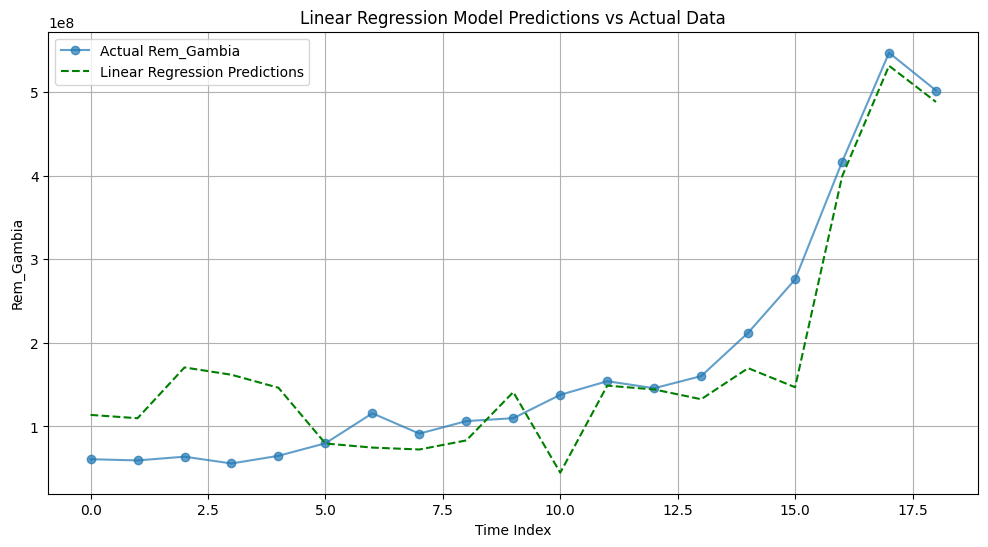

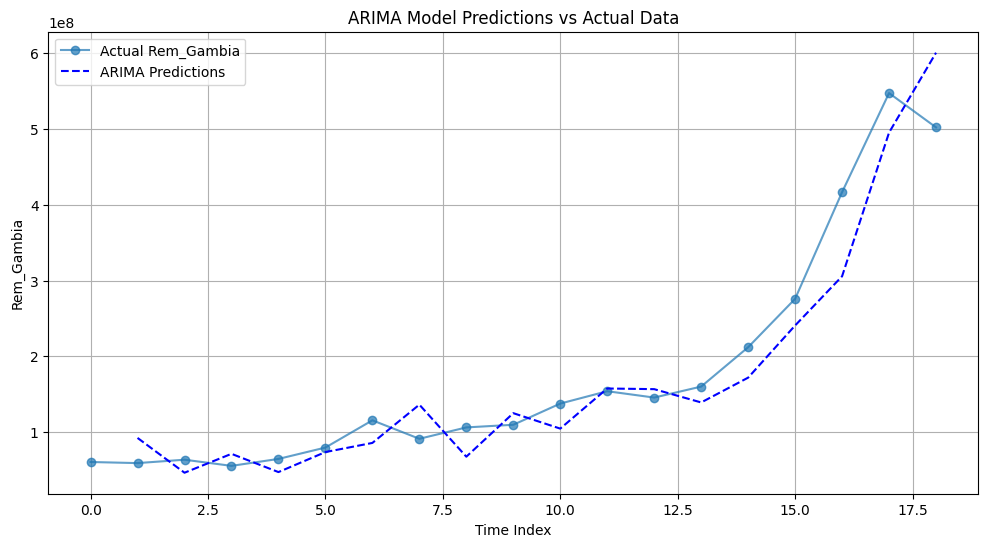

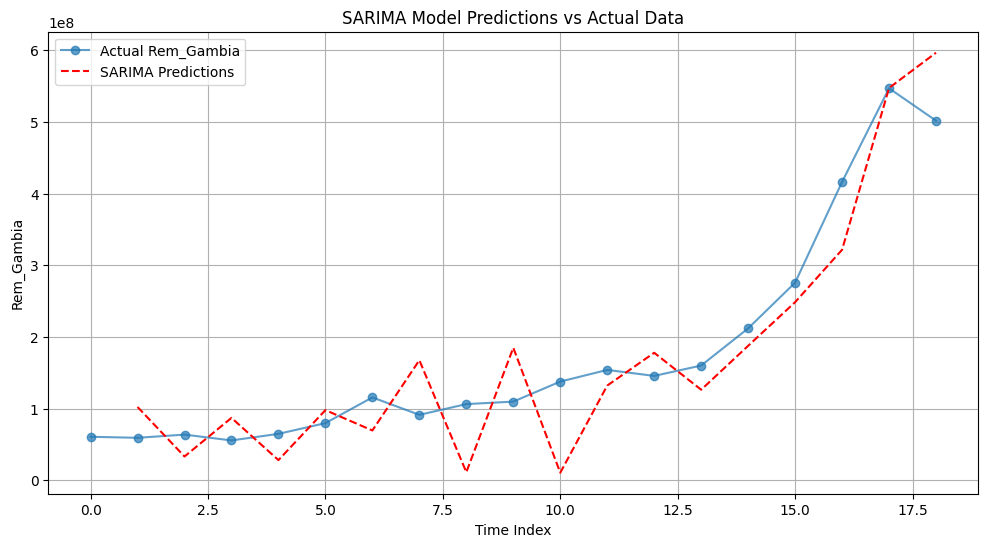

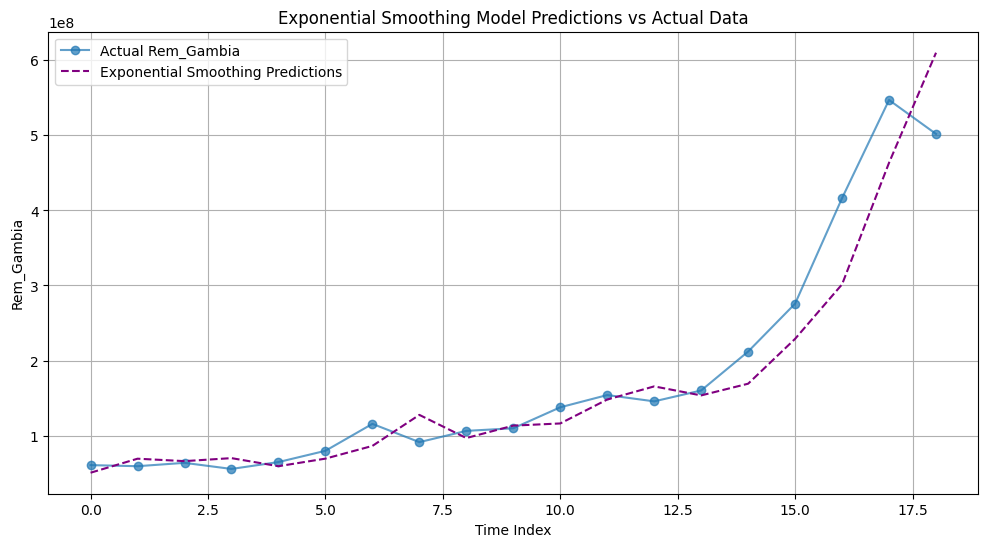

In [6]:
# Visualize Results
import matplotlib.pyplot as plt

# Define time index
time_index = range(len(data))

# Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(time_index, data['Rem_Gambia'], label="Actual Rem_Gambia", marker='o', linestyle='-', alpha=0.7)
plt.plot(time_index, lr_predicted, label="Linear Regression Predictions", color='green', linestyle='--')
plt.title("Linear Regression Model Predictions vs Actual Data")
plt.xlabel("Time Index")
plt.ylabel("Rem_Gambia")
plt.legend()
plt.grid()
plt.show()

# ARIMA
plt.figure(figsize=(12, 6))
plt.plot(time_index, data['Rem_Gambia'], label="Actual Rem_Gambia", marker='o', linestyle='-', alpha=0.7)
plt.plot(time_index[1:], arima_predicted[1:], label="ARIMA Predictions", color='blue', linestyle='--')
plt.title("ARIMA Model Predictions vs Actual Data")
plt.xlabel("Time Index")
plt.ylabel("Rem_Gambia")
plt.legend()
plt.grid()
plt.show()

# SARIMA
plt.figure(figsize=(12, 6))
plt.plot(time_index, data['Rem_Gambia'], label="Actual Rem_Gambia", marker='o', linestyle='-', alpha=0.7)
plt.plot(time_index[1:], sarima_predicted[1:], label="SARIMA Predictions", color='red', linestyle='--')
plt.title("SARIMA Model Predictions vs Actual Data")
plt.xlabel("Time Index")
plt.ylabel("Rem_Gambia")
plt.legend()
plt.grid()
plt.show()

# Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(time_index, data['Rem_Gambia'], label="Actual Rem_Gambia", marker='o', linestyle='-', alpha=0.7)
plt.plot(time_index, hw_predicted, label="Exponential Smoothing Predictions", color='purple', linestyle='--')
plt.title("Exponential Smoothing Model Predictions vs Actual Data")
plt.xlabel("Time Index")
plt.ylabel("Rem_Gambia")
plt.legend()
plt.grid()
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Metrics for Linear Regression
lr_mse = mean_squared_error(y, lr_predicted)
lr_mae = mean_absolute_error(y, lr_predicted)
lr_r2 = r2_score(y, lr_predicted)

# Metrics for ARIMA
arima_mse = mean_squared_error(data['Rem_Gambia'][1:], arima_predicted[1:])
arima_mae = mean_absolute_error(data['Rem_Gambia'][1:], arima_predicted[1:])
arima_r2 = r2_score(data['Rem_Gambia'][1:], arima_predicted[1:])

# Metrics for SARIMA
sarima_mse = mean_squared_error(data['Rem_Gambia'][1:], sarima_predicted[1:])
sarima_mae = mean_absolute_error(data['Rem_Gambia'][1:], sarima_predicted[1:])
sarima_r2 = r2_score(data['Rem_Gambia'][1:], sarima_predicted[1:])

# Metrics for Exponential Smoothing
hw_mse = mean_squared_error(data['Rem_Gambia'], hw_predicted)
hw_mae = mean_absolute_error(data['Rem_Gambia'], hw_predicted)
hw_r2 = r2_score(data['Rem_Gambia'], hw_predicted)

# Summary Table
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "ARIMA", "SARIMA", "Exponential Smoothing"],
    "MSE": [lr_mse, arima_mse, sarima_mse, hw_mse],
    "MAE": [lr_mae, arima_mae, sarima_mae, hw_mae],
    "R²": [lr_r2, arima_r2, sarima_r2, hw_r2]
})

print(model_comparison)


                   Model           MSE           MAE        R²
0      Linear Regression  3.517902e+15  4.515973e+07  0.837627
1                  ARIMA  1.989362e+15  3.463036e+07  0.909902
2                 SARIMA  3.677929e+15  5.050119e+07  0.833428
3  Exponential Smoothing  2.088907e+15  3.062110e+07  0.903584
